In [ ]:
# Importing reqiured packages.
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

# Loading the data file.
df_diamonds_t = pd.read_csv('diamonds_train.csv')

In [ ]:
# Check the first 5 rows of data.
df_diamonds_t.head()

,shape,cut,color,clarity,weight_ct,fluorescence,length_width_ratio,polish,symmetry,girdle,cutlet,price,depth,table,length,width,height
0,Emerald,Very Good,D,SI1,1.70,Medium BlueInfo,1.29,Very Good,Very Good,Thin to Very Thick,None,13519,68.1,70.0,7.94,6.17,4.20
1,Round,Ideal,F,IF,1.07,FaintInfo,1.00,Excellent,Excellent,Thin to Slightly Thick,None,8842,62.4,56.0,6.52,6.54,4.07
2,Radiant,Very Good,G,VVS1,1.05,NoneInfo,1.20,Excellent,Excellent,Slightly Thick to Thick,None,4817,71.3,68.0,6.15,5.12,3.65
3,Round,Ideal,E,VVS2,2.85,NoneInfo,1.01,Excellent,Excellent,Medium to Slightly Thick,None,63161,62.7,58.0,9.06,9.00,5.66
4,Round,Ideal,D,SI1,0.35,NoneInfo,1.00,Excellent,Excellent,Medium to Slightly Thick,None,653,59.9,59.0,4.57,4.59,2.74


In [ ]:
# Checking for missing values.
df_diamonds_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150546 entries, 0 to 150545
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   shape               150546 non-null  object 
 1   cut                 150546 non-null  object 
 2   color               150546 non-null  object 
 3   clarity             150546 non-null  object 
 4   weight_ct           150546 non-null  float64
 5   fluorescence        150546 non-null  object 
 6   length_width_ratio  150546 non-null  float64
 7   polish              150546 non-null  object 
 8   symmetry            150546 non-null  object 
 9   girdle              150546 non-null  object 
 10  cutlet              150546 non-null  object 
 11  price               150546 non-null  int64  
 12  depth               150546 non-null  float64
 13  table               150546 non-null  float64
 14  length              150546 non-null  float64
 15  width               150546 non-nul

The diamonds_train dataset has 17 columns: 9 categorical (object) and 8 numerical (float(7), int(1)); and 150546 rows. There are no missing values.

Text(0.5, 1.0, 'Distribution by the diamond shape')

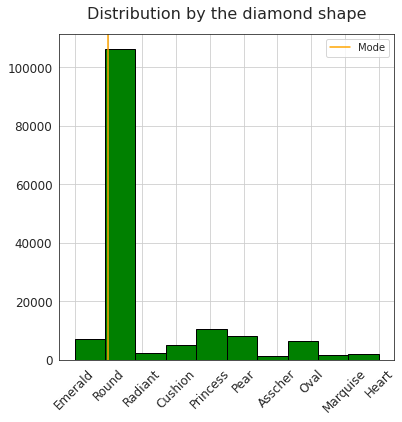

In [ ]:
# Checking data distribution by diamond shape using a histogram (bar graph).
import matplotlib.pyplot as plt

dis_diamonds_t = df_diamonds_t['shape'].hist(xlabelsize=12, xrot=45, ylabelsize=12, figsize = (6,6), color='green', edgecolor='black')
mode = df_diamonds_t['shape'].mode().values[0]
plt.axvline(mode, color='orange', linestyle='-', label="Mode")
plt.legend()
dis_diamonds_t.set_title('Distribution by the diamond shape', fontdict={'fontsize':16}, pad=15)

A histogram shows how frequently a value falls into a particular bin. As we can see, the round diamond shape represent the most values. The histogram is right-skewed. This indicates that there is a number of data points, perhaps outliers, that are greaater than mode.

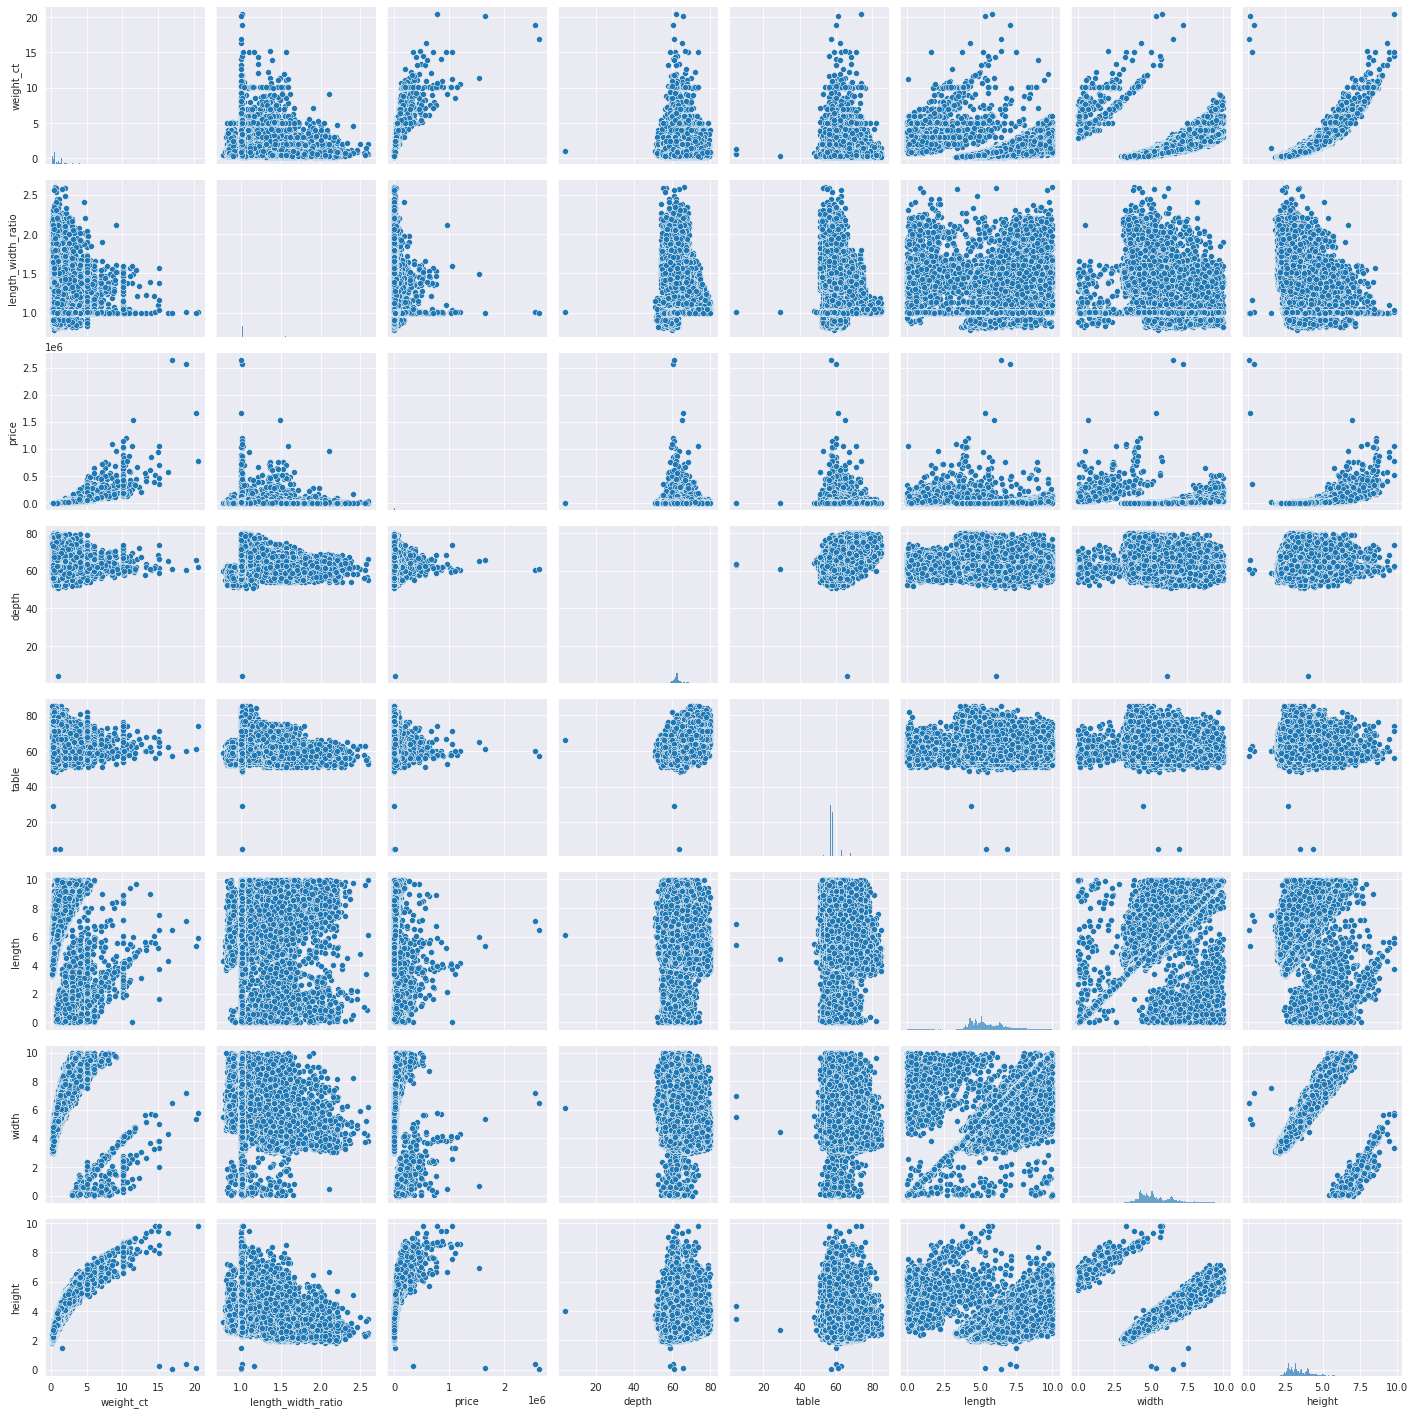

In [ ]:
# Building a pairplot to evaluate data distributions and correlations.
sns.set_style('darkgrid')
sns.pairplot(df_diamonds_t)

The pairplot() function was used to identify relationships between the variables (numeric columns). The distribution of each variable is shown as a histogram along the diagonal boxes. All other boxes display a scatterplot of the relationship between each pairwise combination of variables.
- weight_ct and price: have a strong positive linear relationship. There is a heteroscedastic distribution (unequal scatter), violating one of the assumption of a liniar regression. There is possibility of outliers.
- length_width_ratio and price: has a very weak positive relationship, alomost no relationship. There is a heteroscedastic distribution (unequal scatter). Outliers are present.
- depth and price: has no relationship.
- table and price: has no relationship.
- lenghth and price: has a very weak positive relationship, almost no relationship. There is a heteroscedastic distribution (unequal scatter). Outliers are present.
- width and price: has a very weak positive relationship. There is a heteroscedastic distribution (unequal scatter). Outliers are present.
- height and price: has a posilive exponential relationship. There is a heteroscedastic distribution (unequal scatter). Outliers are present.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


Text(0.5, 1.0, 'Diamonds Correlation Heatmap')

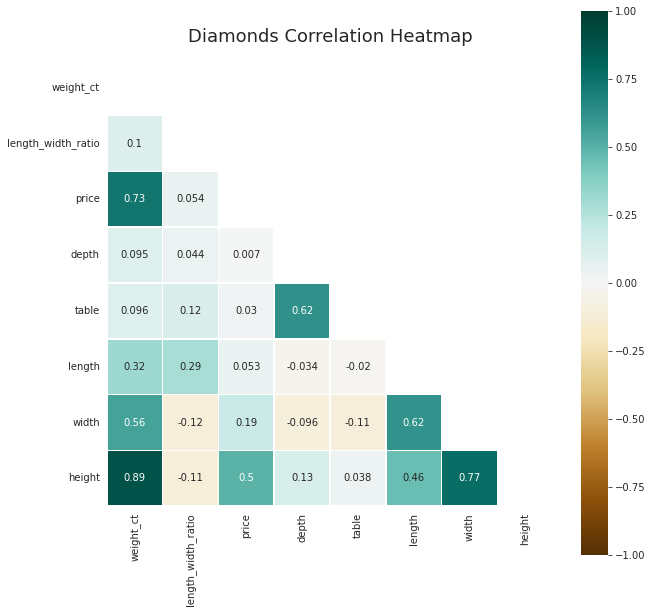

In [ ]:
# Checking correlation coefficient between variables.
import numpy as np
import matplotlib.pyplot as plt
corr = df_diamonds_t.corr()
plt.figure(figsize=(10, 10))
sns.set_style('white')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', square=True, linewidths=.5)
heatmap.set_title('Diamonds Correlation Heatmap', fontdict={'fontsize':18}, pad=18)

The heatmap is a great way to visualize data, because it can show the relation between variabels. In this heatmap we can see the strength of correlation among variables. The darker the color the stronger the correlation.
- weight_ct and price have a positive correlation of 0.73. It tells us that those variables have a strong linear relationship between them. This means that both variables increase or decrease simultaneously.
- height and price have a positive correlation of 0.5, which indictes thet there is a moderate relationship.
- lenghth_width_ratio and price, depth and price, table and price, lenght and price have a corelation coefficient close to zero. Which indicates that there are almost no relationship between those variables.
- width and price has a correlation coefficient of 0.19, which showes that there is a very weak relationshipbetween those variables.
-It seems that depth and price, table and price should have a better (stronger) relationship.

* P.S. I am not an expert at diamonds.

In [ ]:
df_diamonds_t.describe()

,weight_ct,length_width_ratio,price,depth,table,length,width,height
count,150546.000000,150546.000000,1.505460e+05,150546.000000,150546.000000,150546.000000,150546.000000,150546.000000
mean,0.837971,1.084781,6.386796e+03,63.493332,59.694787,5.604533,5.351345,3.434914
std,0.781406,0.184781,2.502329e+04,3.769779,4.535643,1.457813,1.219303,0.793653
min,0.230000,0.780000,2.460000e+02,4.000000,5.000000,0.000000,0.000000,0.070000
25%,0.400000,1.000000,7.880000e+02,61.500000,57.000000,4.640000,4.480000,2.850000
50%,0.560000,1.010000,1.590000e+03,62.500000,58.000000,5.290000,5.100000,3.210000
75%,1.010000,1.020000,5.106000e+03,64.200000,61.000000,6.440000,6.140000,3.940000
max,20.450000,2.600000,2.641889e+06,80.000000,85.000000,9.990000,9.990000,9.810000


The lenght and width columns have minimum value of zero. It does not make any sence. Maxumum values of depth, table and price seems to be to high.

In [ ]:
# Removing outliers if necessary.
from scipy import stats
import numpy as np
numerical_columns = df_diamonds_t.select_dtypes(exclude = 'object').columns
z = np.abs(stats.zscore(df_diamonds_t[numerical_columns]))
new_df_diamonds_t = df_diamonds_t[(z < 3).all(axis = 1)]
new_df_diamonds_t.head()

,shape,cut,color,clarity,weight_ct,fluorescence,length_width_ratio,polish,symmetry,girdle,cutlet,price,depth,table,length,width,height
0,Emerald,Very Good,D,SI1,1.70,Medium BlueInfo,1.29,Very Good,Very Good,Thin to Very Thick,None,13519,68.1,70.0,7.94,6.17,4.20
1,Round,Ideal,F,IF,1.07,FaintInfo,1.00,Excellent,Excellent,Thin to Slightly Thick,None,8842,62.4,56.0,6.52,6.54,4.07
2,Radiant,Very Good,G,VVS1,1.05,NoneInfo,1.20,Excellent,Excellent,Slightly Thick to Thick,None,4817,71.3,68.0,6.15,5.12,3.65
3,Round,Ideal,E,VVS2,2.85,NoneInfo,1.01,Excellent,Excellent,Medium to Slightly Thick,None,63161,62.7,58.0,9.06,9.00,5.66
4,Round,Ideal,D,SI1,0.35,NoneInfo,1.00,Excellent,Excellent,Medium to Slightly Thick,None,653,59.9,59.0,4.57,4.59,2.74


One of the most commonly used tools in determining outliers is the Z-score. Z-score is just the number of standard deviations away from the mean that a certain data point is. The standard cut-off value for finding outliers is Z degrees +/- 3 or greater than zero.

In [ ]:
print('Old shape:', df_diamonds_t.shape)
print('New shape:', new_df_diamonds_t.shape)

Old shape: (150546, 17)
New shape: (137881, 17)


The  old df_diamonds_t dataset has 17 columns and 150546 rows.
The new_df_diamonds_t dataset (wirhout outliers) has 17 columns and 137881 rows.

In [ ]:
new_df_diamonds_t.describe()

,weight_ct,length_width_ratio,price,depth,table,length,width,height
count,137881.000000,137881.000000,137881.000000,137881.000000,137881.000000,137881.000000,137881.000000,137881.00000
mean,0.745160,1.069178,4085.467657,63.104844,59.166721,5.638449,5.340402,3.36963
std,0.495675,0.154384,6430.280491,3.080762,3.699220,1.238816,1.058383,0.67376
min,0.230000,0.780000,246.000000,52.200000,48.000000,1.240000,2.980000,1.51000
25%,0.400000,1.000000,775.000000,61.500000,57.000000,4.690000,4.510000,2.84000
50%,0.540000,1.010000,1517.000000,62.500000,58.000000,5.300000,5.110000,3.20000
75%,1.000000,1.010000,4724.000000,63.800000,60.000000,6.420000,6.100000,3.88000
max,3.180000,1.630000,79890.000000,74.800000,73.000000,9.970000,9.000000,5.81000


Some statistical measuares in the new dataset have been changed. For example, the minimum of lenght and width columns have been changed form zero to 1.24 and 2.98 respectivly. The maximum values of the price is lower, 79890.

The new dataset (new_df_diamonds_t), as the old one (df_diamonds_t) do not have any missing values. We use impute approach when we have missing values.

In [ ]:
# Merging two datasets.
df_1 = new_df_diamonds_t
df_2 = pd.read_csv('diamonds_score.csv')
df_all_rows = pd.concat([df_1, df_2])
df_all_rows.head()

,shape,cut,color,clarity,weight_ct,fluorescence,length_width_ratio,polish,symmetry,girdle,cutlet,price,depth,table,length,width,height
0,Emerald,Very Good,D,SI1,1.70,Medium BlueInfo,1.29,Very Good,Very Good,Thin to Very Thick,None,13519,68.1,70.0,7.94,6.17,4.20
1,Round,Ideal,F,IF,1.07,FaintInfo,1.00,Excellent,Excellent,Thin to Slightly Thick,None,8842,62.4,56.0,6.52,6.54,4.07
2,Radiant,Very Good,G,VVS1,1.05,NoneInfo,1.20,Excellent,Excellent,Slightly Thick to Thick,None,4817,71.3,68.0,6.15,5.12,3.65
3,Round,Ideal,E,VVS2,2.85,NoneInfo,1.01,Excellent,Excellent,Medium to Slightly Thick,None,63161,62.7,58.0,9.06,9.00,5.66
4,Round,Ideal,D,SI1,0.35,NoneInfo,1.00,Excellent,Excellent,Medium to Slightly Thick,None,653,59.9,59.0,4.57,4.59,2.74


I create a new dataframe df_all_rows using concat function, which basically combined or appended one DataFrame with another.

In [ ]:
df_all_rows.shape

(137891, 17)

In [ ]:
# Creating a new dataset for diamonds with only round shapes.
round_shape = df_all_rows.loc[(df_all_rows['shape']=='Round')]
round_shape.head()

,shape,cut,color,clarity,weight_ct,fluorescence,length_width_ratio,polish,symmetry,girdle,cutlet,price,depth,table,length,width,height
1,Round,Ideal,F,IF,1.07,FaintInfo,1.00,Excellent,Excellent,Thin to Slightly Thick,None,8842,62.4,56.0,6.52,6.54,4.07
3,Round,Ideal,E,VVS2,2.85,NoneInfo,1.01,Excellent,Excellent,Medium to Slightly Thick,None,63161,62.7,58.0,9.06,9.00,5.66
4,Round,Ideal,D,SI1,0.35,NoneInfo,1.00,Excellent,Excellent,Medium to Slightly Thick,None,653,59.9,59.0,4.57,4.59,2.74
5,Round,Ideal,K,VVS2,0.40,StrongInfo,1.01,Excellent,Very Good,Medium to Slightly Thick,None,565,60.1,61.0,4.80,4.73,2.86
7,Round,Ideal,I,VVS2,0.50,NoneInfo,1.01,Very Good,Very Good,Medium to Slightly Thick,None,1290,60.0,60.0,5.14,5.20,3.10


I created a new dataset which contains diamonds with only round shape, because our assignment specified that we have to build a multiple linear regression model to predict price for round diamonds.

In [ ]:
round_shape.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104125 entries, 1 to 9
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   shape               104125 non-null  object 
 1   cut                 104125 non-null  object 
 2   color               104125 non-null  object 
 3   clarity             104125 non-null  object 
 4   weight_ct           104125 non-null  float64
 5   fluorescence        104125 non-null  object 
 6   length_width_ratio  104125 non-null  float64
 7   polish              104125 non-null  object 
 8   symmetry            104125 non-null  object 
 9   girdle              104125 non-null  object 
 10  cutlet              104125 non-null  object 
 11  price               104125 non-null  int64  
 12  depth               104125 non-null  float64
 13  table               104125 non-null  float64
 14  length              104125 non-null  float64
 15  width               104125 non-null  fl

The round shape dataset has 17 columns (object: 9, float: 7, int: 1) and 104125 rows. No missing values.

In [ ]:
round_shape.describe()

,weight_ct,length_width_ratio,price,depth,table,length,width,height
count,104125.000000,104125.000000,104125.000000,104125.000000,104125.000000,104125.000000,104125.000000,104125.000000
mean,0.677349,1.006999,3575.806732,62.188873,57.945779,5.399836,5.394482,3.356977
std,0.434593,0.005196,5658.035756,1.513300,2.037222,1.038447,1.041307,0.650769
min,0.230000,1.000000,282.000000,53.500000,48.000000,3.770000,3.720000,1.510000
25%,0.370000,1.000000,700.000000,61.400000,56.000000,4.580000,4.570000,2.840000
50%,0.510000,1.010000,1358.000000,62.300000,58.000000,5.120000,5.110000,3.190000
75%,0.950000,1.010000,4199.000000,62.900000,59.000000,6.170000,6.170000,3.880000
max,3.050000,1.240000,79890.000000,69.400000,75.000000,9.080000,9.000000,5.810000


In [ ]:
# Correlation after dropping outliers (between target (price) and features).
correlations = round_shape.corr()
round(correlations['price'].sort_values(ascending=False),2)

price                 1.00
weight_ct             0.89
length                0.82
width                 0.82
height                0.81
table                 0.01
length_width_ratio   -0.01
depth                -0.03
Name: price, dtype: float64

Correlation after dropping outliers has been changed. Correlations between price and weight_ct, lenght, width, hight are significantly improved.

In [ ]:
predictors = ['shape', 'cut', 'color', 'clarity', 'weight_ct', 'fluorescence',
       'length_width_ratio', 'polish', 'symmetry', 'girdle', 'cutlet',
       'depth', 'table', 'length', 'width', 'height']

In [ ]:
X = pd.get_dummies(round_shape[predictors], drop_first=True)

In [ ]:
round_shape.columns.get_loc('price')

11

In [ ]:
# Splitting data 70/30 into training and test datasets.
X_new = X.iloc[:-10, :]
score_new = round_shape.iloc[-10:, :]
y =  round_shape.iloc[:-10, 11]

train_X, valid_X, train_y, valid_y = train_test_split(X_new, y, test_size=0.3, random_state=1)

In [ ]:
# Sanity check for the sampled data.
print(train_X.shape)
print(train_y.shape)
print(valid_X.shape)
print(valid_y.shape)

(72880, 107)
(72880,)
(31235, 107)
(31235,)


In [ ]:
# Building a multiple linear regression model to predict price for round diamonds.
re_prices = LinearRegression()
re_prices.fit(train_X, train_y)

LinearRegression()

In [ ]:
round(re_prices.intercept_, 2)

-30406.58

In [ ]:
re_prices.coef_

array([ 2.49737883e+04, -9.98269009e+03,  1.00894413e+03, -4.18105928e+01,
        5.57875176e+03,  3.54321224e+03, -2.39172221e+04, -7.91568073e+01,
        2.05089902e+02, -2.05363256e+02,  7.55724802e+01, -3.76204756e+02,
       -5.34108988e+02, -9.12563553e+02, -1.37441381e+03, -1.66390901e+03,
       -2.06551018e+03, -2.46529293e+03, -2.91592846e+03, -4.63015062e+03,
       -5.10976393e+03, -3.99481963e+03, -4.31996467e+03, -3.37773201e+03,
       -3.76899256e+03,  4.10426504e+02, -3.60064893e+02, -1.00352177e+03,
        6.84212718e+01,  3.68050969e+02, -6.91882661e+02, -4.12304230e+02,
       -2.41360721e+02, -8.86132565e+02, -6.58105133e+02,  8.73039244e+01,
        7.22150365e+01, -1.62488763e+02, -1.05737606e+02, -4.44036529e+02,
        5.75164960e+02,  4.51256301e+02,  7.50965398e+02,  9.59234660e+02,
        2.39696616e+02,  1.08045945e+03,  8.28230814e+02,  1.99172825e+03,
        1.01287280e+03,  1.01522595e+03,  1.46964317e+03,  7.74692500e+02,
        1.82623951e+03,  

In [ ]:
pred_y = re_prices.predict(valid_X)

In [ ]:
# Reporting R2, MAE, Max error, RMSE.
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

Regression model performance evaluation
R2:  0.8714207490285268
MAE:  957.9185775680207
RMSE:  2027.0305137697944
Max error:  68292.2368989537


- R2 is 87.14%, which means 12.86% of error rate exists in this model (12.86% of reduction in prediction error).
- MAE is 957.92. It is an average of the absolute difference between the target true value and the value predicted by the model. On average, a round shape diamond price is 957.92 dollars away from the predicted value by the model. The closer the value of the MAE is to zero, the better.
- RMSE is 2027.03. It tells us that the average deviation between the predicted round shape dimond price made by the model and the actual dimond price is 2027.03.
- Max error is 68292.24. It is the worst case error between the predicted value and the true value. The maximun difference between the predictet price and the real price is $68292.24

Using the model to predict prices in the diamond_score.csv dataset andn comparing predicted and actual prices for the diamonds in the diamond_score.csv dataset.

In [ ]:
df_diamonds_s = pd.read_csv('diamonds_score.csv')
df_diamonds_s.head()

,shape,cut,color,clarity,weight_ct,fluorescence,length_width_ratio,polish,symmetry,girdle,cutlet,price,depth,table,length,width,height
0,Round,Ideal,G,VVS1,0.58,FaintInfo,1.01,Excellent,Excellent,Thin to Medium,None,2311,62.4,56,5.31,5.34,3.32
1,Round,Ideal,J,SI1,1.00,NoneInfo,1.01,Very Good,Very Good,Medium to Slightly Thick,Medium,3985,61.8,61,6.35,6.40,3.94
2,Round,Very Good,F,VVS2,0.90,NoneInfo,1.02,Excellent,Very Good,Medium to Slightly Thick,None,5935,64.3,56,6.12,6.02,3.90
3,Round,Ideal,H,VS1,0.30,NoneInfo,1.01,Excellent,Very Good,Medium to Slightly Thick,None,578,62.2,56,4.30,4.26,2.66
4,Round,Very Good,I,VS2,1.51,NoneInfo,1.24,Excellent,Excellent,Slightly Thick to Thick,None,7195,69.4,67,7.20,5.79,4.02


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   shape               10 non-null     object 
 1   cut                 10 non-null     object 
 2   color               10 non-null     object 
 3   clarity             10 non-null     object 
 4   weight_ct           10 non-null     float64
 5   fluorescence        10 non-null     object 
 6   length_width_ratio  10 non-null     float64
 7   polish              10 non-null     object 
 8   symmetry            10 non-null     object 
 9   girdle              10 non-null     object 
 10  cutlet              10 non-null     object 
 11  price               10 non-null     int64  
 12  depth               10 non-null     float64
 13  table               10 non-null     int64  
 14  length              10 non-null     float64
 15  width               10 non-null     float64
 16  height     

In [ ]:
# Using the model to predict prices in the diamond_score.csv dataset.
target = df_2['price']

X_score = X.iloc[-10:, :]
Y_score = target

y_pred = re_prices.predict(X_score)

In [ ]:
# Comparing predicted and actual prices for the diamonds in the diamond_score.csv dataset.
result_score = pd.DataFrame({'Predicted Price': y_pred, 'Actual Price_score': Y_score, 'Error_Residual': Y_score - y_pred})
print(round(result_score, 0))

   Predicted Price  Actual Price_score  Error_Residual
0           2831.0                2311          -520.0
1           4071.0                3985           -86.0
2           5172.0                5935           763.0
3            500.0                 578            78.0
4          23503.0                7195        -16308.0
5          11528.0                8942         -2586.0
6           5562.0                 486         -5076.0
7            262.0                 483           221.0
8            360.0                 514           154.0
9           6818.0                6725           -93.0


Some predicted prices are close to actual. But some are overestemated.